# FİZ219 - Bilgisayar Programlama I | 14/12/2020
# Ödev: 2 (&3)
**Grafik, en küçük kareler yöntemi ve Monte Carlo ile integral alma**

**Son gönderim tarihi: 27 Aralık Pazar, 23:59**

Merhaba Arkadaşlar, kapsamlı bir ödevle karşınızdayız. Anlata anlata gideceğim, takıldığınız yerler olursa derste mutlaka sorun.

## Grafik çizimi ve en küçük kareler yöntemi
İşe grafik çizerek başlayacağız. Bir deneyden şu x-y çiftlerini elde etmiş olalım:

x|-6|-5|-4|-3|-2|-1|0|1|2|3|4|5|6
---|---|---|---|---|---|---|---|---|---|---|---|---|---
**y**|-21|-20|-16|-10|-7|-2|2|6|11|13|18|24|25


Geçirmekle uzun uzadıya uğraşmayın diye, aşağıdaki bloğu kopyala/yapıştır yapabilirsiniz:

`xy = [
   -6,-21
   -5,-20
   -4,-16
   -3,-10
   -2, -7
   -1, -2
    0,  2 
    1,  6 
    2, 11
    3, 13
    4, 18
    5, 24
    6, 25]`

İlk iş olarak, bu x-y değerlerinin grafiğini çizdirin: 
* mavi renkte,
* noktalar daireler şeklinde gösterilsin,
* daireler de düz çizgi ile birleşmiş

olsun, yani:

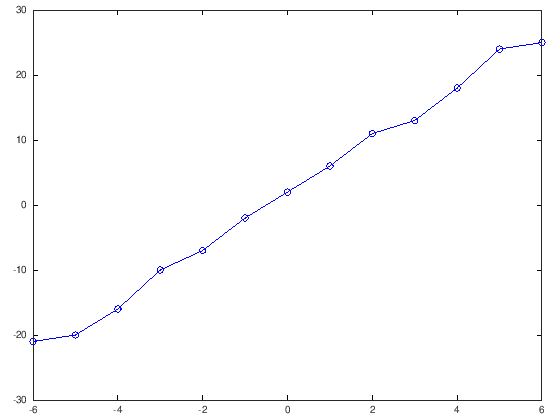

gibi bir şey..

**İkinci adımda,** bu noktalara en yakından geçen doğrunun denklemini hesaplatıp, bu doğruyu çizdirin -- şöyle bir şey bekleniyor:

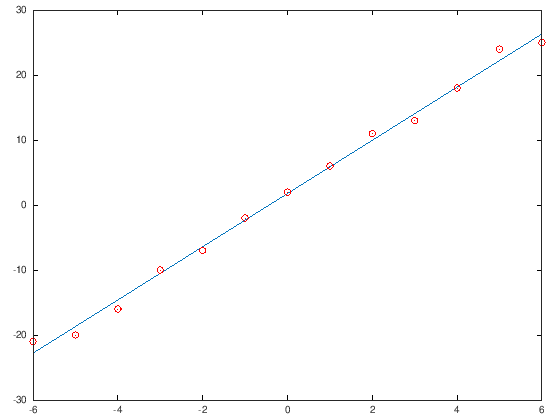

Hesapladığınız eğim ve öteleme değerlerini not edin ($y=mx+n$ denkleminde $m$: eğim, $n$: öteleme oluyor).

**Üçüncü adımda,** $y = x^2 + 4x - 24$ parabolünü de elimizdeki x-aralığı ([-6,6]) için ilk başta verilen veriler ve bulduğumuz en uygun doğru ile birlikte çizdirin:

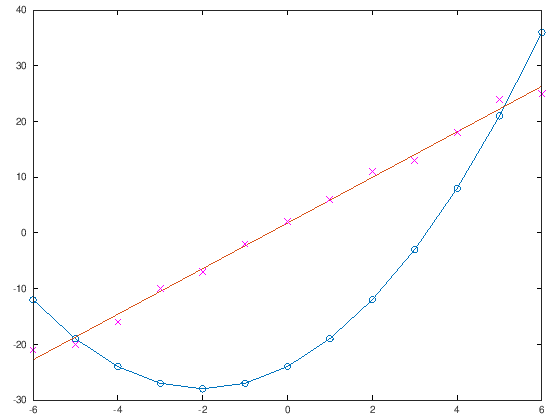

**Dördüncü aşama olarak,** grafiği doğru ve parabolün kesiştiği noktalara odaklayarak (_zoom_ yaparak), bu noktaların koordinatlarını kestirin.

Noktaların x-değerlerini doğru ve parabol denklemlerinde yerine koyup, iki denklemden çıkan y-değerlerinin farklarının mutlak değerlerine bakın.

**Bonus: Kesişme noktalarını analitik olarak hesaplayın.**

## Monte Carlo yöntemi ile integral hesabı
Grafiğimizi köşeleri (-5.0299,-29), (-5.0299,25), (5.1233,25), (5.1233,-29) olan bir dikdörtgen içine alın (veri noktalarını işaretlemenize gerek yok):

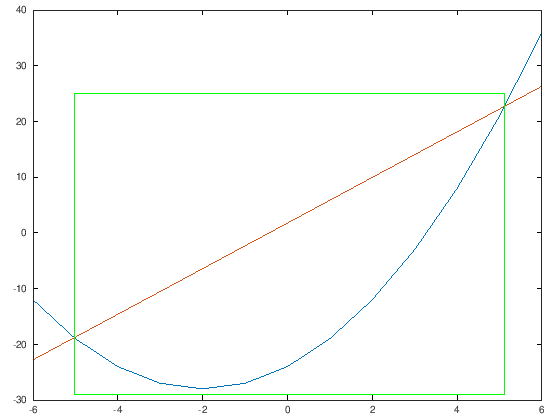

Dikdörtgenin sınırları dahilinde 10000 adet rasgele sayı çifti oluşturun, bunlardan doğru ile parabol arasına düşenleri kırmızı noktalar ile, dışına düşenleri mavi noktalar ile işaretleyin:

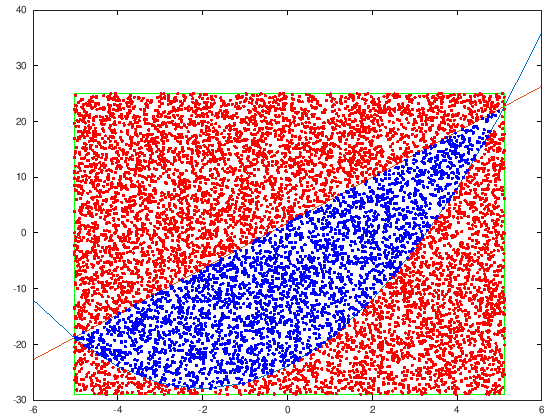

### Yardım
Bu kısım biraz çetrefilli olabilir, o nedenle düşüne düşüne gidelim:

Dikdörtgenimizin x sınırlarını kesişim noktalarına göre seçtik, burası bariz. Şimdi bu dikdörtgenin içinde rasgele bir nokta olarak $(x_0,y_0)$ noktasını oluşturduğumuzu düşünelim -doğrunun ve parabolün tam üzerinde çıkmadığını varsayarsak- ait olabileceği sadece 3 bölge var:

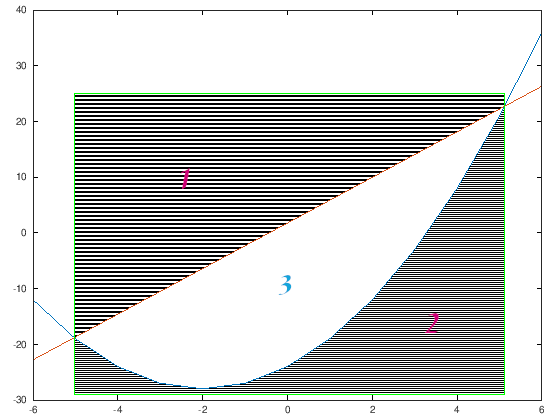

(2. bölgenin sol alt kısmı da kapsadığına dikkat edin)

Rasgele aldığımız $(x_0,y_0)$ noktasının $x_0$ değerini kullanarak doğru üzerinde ve paraboldeki değerlerini bulalım: örneğin m:4, n:2 olsa idi, bizim rasgele noktamız da (0,5) olsaydı:

* Doğru üzerinde bu $x_0$'a karşılık gelen $y_d$: $4(0)+2=2$
* Parabol üzerinde bu $x_0$'a karşılık gelen $y_p$: $(0)^2+4(0)-24=-24$ 

olacaktı. Noktamızın 5 olan y değeri bu iki değerin de yukarısında (bir başka deyişle: ikisinden de büyük), yani grafikten bakmadan da 1. bölgede olduğuna karar verebilirdik.

Peki ya rasgele noktamız $(x_1,y_1) = (0,-5)$ olsaydı? -5 olan $y_1$ değerimiz doğrunun $y_d=2$ değerinin altında, parabolün $y_p=-24$ olan değerinin üzerinde -- bu durumda 3. bölgede oluyor.

Geriye sadece bir olasılık (/permütasyon) kalıyor: verilen bir $(x_2,y_2)$ çifti için hesaplanan $y_d$'nin de $y_p$'nin de $y_2$'den büyük olduğu durum, yani bir başka deyişle, $y_2$'nin ikisinin de altında kaldığı durum (örneğin $(x_2,y_2)=(0,-27)$ noktası) ki, o zaman da 2. bölgede olduğunu söylerdik.

Bu dediklerimizi sistematik bir hale geçirmek için birden fazla yöntem var (ilk akla gelen herhalde tek tek rasgele y değerlerinin x'leri için hesaplanan $y_d$ ve $y_p$ değerlerinden büyük olup olmadığına bakmak) - en pratik olanlarından biri için şu adımları izleyin:

1. İstenen sayıda ($N=10000$) rasgele ikili sayı çiftlerini içeren, $(N,2)$ boyutunda bir `veriler` matrisi üretin.
2. Bu matrisin üçüncü sütununu x değerlerinin (yani 1. sütundaki değerlerin) $m$ ile çarpılıp, $n$ eklendiği değer olarak tanımlayın (yani $y_d$'leri elde ettik).
3. Matrisin dördüncü sütununu ise x değerlerinin (yani 1. sütundaki değerlerin) kareleri + 4 * x değerleri - 24 olarak tanımlayın.

Bu göründüğü kadar karışık değil aslında. Örnek olarak 5 tane rasgele sayı çifti tanımlayıp, bunun 1. sütununu x, 2. sütununu y; 3. sütununu $y_d = 5x-2$; 4. sütununu ise $y_p=x^2-2x+3$ olarak hesaplatalım:

In [1]:
# Sizde de mantıklı sayılar çıktığından emin olmak için:
rand("seed",219) 

# Normalde tabii ki rasyonel sayılarla uğraşacağız 
# ama şimdi kolayca kontrol edebilelim diye bilerek
# rand() yerine tamsayı rasgele sayılar üreten randi()
# fonksiyonunu kullanıyorum
matris = randi([-3,3],[5,2])
matris(:,3) = matris(:,1)*5 - 2
matris(:,4) = matris(:,1).^2 - 2*matris(:,1) + 3

matris =

   1   0
  -3   1
  -2   0
   0   1
  -2  -1

matris =

    1    0    3
   -3    1  -17
   -2    0  -12
    0    1   -2
   -2   -1  -12

matris =

    1    0    3    2
   -3    1  -17   18
   -2    0  -12   11
    0    1   -2    3
   -2   -1  -12   11



Bu noktalarının hangilerinin parabol ile doğru arasında, hangilerinin dışında olduğunu nasıl anlarız? tabii ki $y$ (2. sütun), $y_d$ (3. sütun) ve $y_p$ (4. sütun) değerlerini kıyaslayarak. 

Örneğin, ilk nokta olan $(1,0)$ noktasını ele aldığımızda, $y=0$ olduğundan 3 olan $y_d$'den de, 2 olan $y_p$'den de aşağıda, bu da onu dışarıya koyuyor (bu örnekte kullandığımız doğru ve parabol denklemlerinin sorumuzdakiler olmadığına çok dikkat edin!). İkinci noktaya baktığımızda: $-17<1<18$ yani: $y_d<y<y_p$ olduğunu görüyoruz ki, bu da onun doğrunun üzerinde, parabolün altında (**yani arada!**) olduğunu gösteriyor. Burada elde edemedik (diğer noktalar da doğrunun üzerinde, parabolün altında çıktı) ama diğer bir ihtimalde, $y<y_d$ ve $y<y_p$ olurdu ve bu da yine dışarıda olduğunu gösterirdi.

Bizim grafiğe ve denklemlere dönecek olursak, aradığımız özellik (noktamızın ara bölge olan 3. bölgede olması için gerekli olanın), rasgele olarak tuttuğumuz $y$ değerimizin aynı $x$ değerine karşılık gelen $y_d$ değerinin altında, $y_p$ değerinin üzerinde olması. Bu bölgede ilişkiler dikkat ederseniz:

$$y_d - y > 0,\quad y_p - y<0$$

şeklinde çıkmakta. Hatta tablo üzerinde gösterirsek:

Bölge|$y_d - y$|$y_p - y$
---|---|---
1|-|-
2|+|+
3|+|-

İlgilendiğimiz bölge 3. bölge olduğundan, bu bölgede tanımladığımız farkların zıt işaretli olmasını kullanabiliriz. ("$y_d - y > 0$ **ve** $y_p - y$ ise _arada (3. bölgede)_ diye işaretle" demek yerine, tek işlemle bu kontrolü sağlayabiliriz ;)

Ürettiğimiz noktaları arada olup olmadıklarına göre ayırmak asıl zorlayıcı olan kısımdı, artık bunların kaç tane olduğunu kolayca sayabiliriz.

### Alan hesabı
Toplam $N=10000$ nokta gönderdiğinize ve bunların $n$ tanesinin ilgilendiğimiz ara bölgeye düştüğünü hesapladığımıza göre, doğru orantı kullanarak, ara bölgenin alanını hesaplayın.

Dikdörtgenin alanı: $$(\Delta x).(\Delta y) = (5.1233 - (-5.0299)).(25-(-29))=548.27\text{ br}^2$$

olduğuna göre ve $N=10000$ nokta bununla orantılı olduğuna göre, $n$ nokta kaça karşılık gelir?

**Bonus: Ara bölgenin alanını analitik olarak hesaplayın.**

**Ultra Bonus: Dikdörtgen yerine, doğrunun yatay eksenle tanımladığı yamuğu referans alıp ara bölgenin alanını Monte Carlo yöntemi ile o şekilde çözün.**

# Çözümler

ans =

   -6  -21
   -5  -20
   -4  -16
   -3  -10
   -2   -7
   -1   -2
    0    2
    1    6
    2   11
    3   13
    4   18
    5   24
    6   25



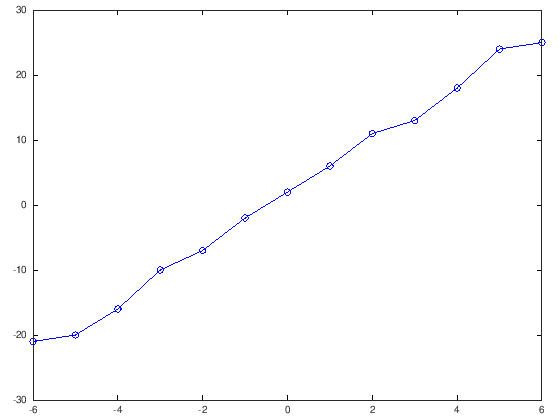

In [2]:
clear;
rand("seed",219)
m1 = 4; n1 = 2;
x1 = -6:6;
y1 = m1*x1+n1+randi([-2,2],[1,numel(x1)]);
[x1',y1']
plot(x1,y1,"-bo")

veriler =

   -6  -21
   -5  -20
   -4  -16
   -3  -10
   -2   -7
   -1   -2
    0    2
    1    6
    2   11
    3   13
    4   18
    5   24
    6   25

m =  4.0934
n =  1.7692


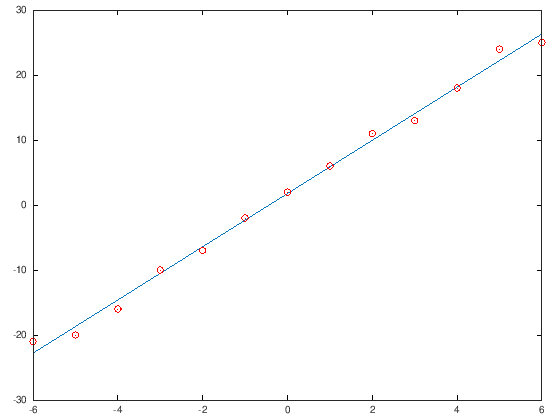

In [3]:
veriler = [
   -6  -21
   -5  -20
   -4  -16
   -3  -10
   -2   -7
   -1   -2
    0    2
    1    6
    2   11
    3   13
    4   18
    5   24
    6   25] % ilk sütun x, ikinci sütun y değerleri

x = veriler(:,1); % Tüm satırlar (":"), 1. sütun
y = veriler(:,2); % Tüm satırlar (":"), 2. sütun
A11 = A12 = A22 = B11 = B12 = 0; % Hesaplanacak değerler
N = rows(x); % Kaç adet verimiz olduğu
for i = 1:N
    A11 = A11 + 2*x(i)^2;
    A12 = A12 + 2*x(i);
    A22 = A22 + 2;
    B11 = B11 + 2*x(i)*y(i);
    B12 = B12 + 2*y(i);
endfor

% Toplamlar hesaplandı bile! 8)
m = (B11 - (A12 * B12 / A22))  / (A11 - (A12^2 / A22))
n = (B12 - A12 * m) / A22 

% Artık verilerimize en yakın geçen 
% doğrunun denklemi elimizde olduğuna göre
% hem doğruyu, hem de deney verilerini birlikte
% çizdirelim

xx = linspace(-6,6,100);
tt = m.*xx + n;
plot(xx,tt,x,y,"ro")

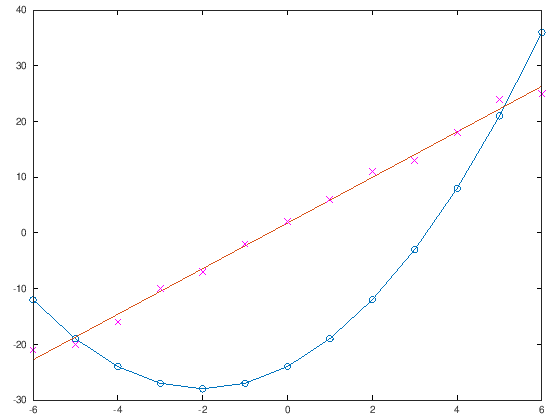

In [4]:
x2 = -6:6;
y2 = x2.^2 + 4*x2-24;
plot(x2,y2,"-o",x2,m*x2+n,"-",x1,y1,"xm")

$$y_1 = x^2 + 4x - 24$$
$$y_2 = (4.0934)x + (1.7692)$$

$$ y_1 = y_2 \Rightarrow x^2 + 4x - 24 = (4.0934)x + (1.7692)\\
\Rightarrow x^2 + (4 - 4.0934)x - (24 + 1.7692) = 0$$

In [31]:
a = 1; b = 4-4.0934; c = -(24+1.7692);
x1 = (-b - sqrt(b**2 - 4*a*c)) / (2*a)
x2 = (-b + sqrt(b**2 - 4*a*c)) / (2*a)

y1 = x1**2 + 4*x1 - 24
y2 = x2**2 + 4*x2 - 24

x1 = -5.0299
x2 =  5.1233
y1 = -18.820
y2 =  22.741


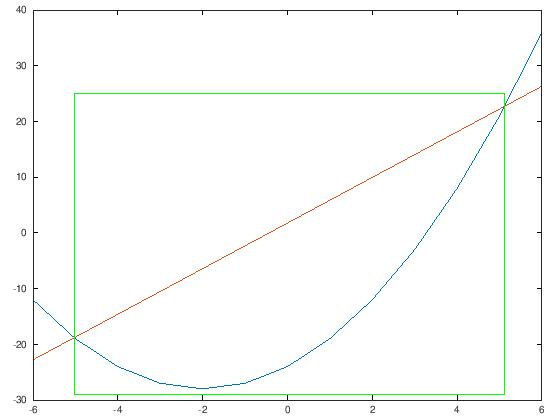

In [5]:
d4x = [-5.0299,-5.0299,5.1233,5.1233,-5.0299];
d4y = [-29,25,25,-29,-29];
plot(x2,y2,"-",x2,m*x2+n,"-",d4x,d4y,"g-")

ans =  3178
ans =  174.24


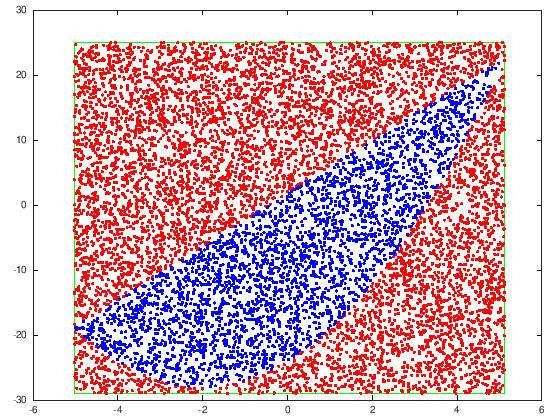

In [30]:
rand("seed",219)
xmin = -5.0299; xmax = 5.1233;
ymin = -29; ymax = 25;

N = 10000;
xr = rand([N,1])*(xmax-xmin)+xmin;
yr = rand([N,1])*(ymax-ymin)+ymin;

data = [xr,yr,m*xr+n-yr,xr.^2+4*xr-24-yr];
data(:,5) = sign(data(:,3).*data(:,4));
data_dis = data(data(:,5)>=0,:);
data_ic = data(data(:,5)<0,:);
plot(x2,y2,"-",x2,m*x2+n,"-",d4x,d4y,"g-",
data_dis(:,1),data_dis(:,2),"r.",
data_ic(:,1),data_ic(:,2),"b.")

rows(data_ic)

# 10000 nokta 548.27 br^2 alan ise
# rows(data_ic) nokta kac alan olur?
rows(data_ic) * 548.27 / 10000

`integral((4.0934*x+1.7692)-(x^2+4*x-24),x=-5.0299..5.1233)
=174.44`

# Ödev Kuralları
* Bu sizin 2. ödevinizdir.
* Her gruptan sadece 1 ödev gönderilecektir, onu da grup sözcüsü gönderecektir.
* Ödev, dersin HUZEM sayfasından gönderilecektir, lütfen e-posta ile göndermeyin.
* Ödevlerinizi yaparken tabii ki internetten ve diğer indirekt/asenkron/her ne deniyorsa kaynaktan faydalanabilirsiniz ama grup üyeleriniz dışında ödev konusunda dışarıdan birilerine danışmanız yasaktır. Ayrıca sizin Google'da arama ve kopyalayıp/yapıştırma yeteneklerinizi değil, program yazabilme yeteneklerinizi sınadığım gerçeğini de sakın aklınızdan çıkarmayın. Faydalandığınız kaynakları mutlaka belirtin (kodunuzun sonunda yorum olarak belirtebilirsiniz). Aksinin yapıldığı saptandığı/düşünüldüğü takdirde size uyarı gönderilmeden, soruşturma açtırılacaktır.
* Ödev için birden fazla dosya kullanılırsa, zip'lenerek tek dosya olarak gönderilecektir. Bu durumda ödev dosyalarının adı `grupadi_odev2_1.m`, `grupadi_odev2_2.m`, ... şeklinde olacak, zip dosyasının adı ise `FIZ219_Odev2_GrupAdi.zip` biçiminde olacaktır.
* Lütfen ödev kodlarınızın başına grubunuzun adını ve -hiçbir katkıda bulunmamış/ulaşılamamış olsa da- grup üyelerinin adlarını yorum satırı olarak yazın.
* Ödevlerin son gönderim tarihi 27 Aralık Pazar gecesi (27/12/2020 23:59) olup, gönderim saatinden biraz (~ birkaç saat) sonrasında da gönderim mümkün olsa da, geç ödevlerden puan kırılacaktır. Bu süre de geçince ödev kabul edilmeyecektir.
* Son gönderim tarihi geçtikten sonra ödevlerinizin değerlendirilmesi üç aşamadan oluşacaktır:
  * Gönderilen ödevlerinizin notlandırılması
  * Grup üyelerinin diğer grup üyelerinin katkılarını değerlendirmesi
  * Sözlü sınav
* Ödevinizi bütün grup elemanlarınızla birlikte, topluca yapın. Hem kapsamlı bir ödevle karşı karşıyasınız, hem de sonrasında değerlendirme formunda takım çalışması konusunda da bilgi istenecektir. Herkesin kendi başına diğerlerinden bağımsız bir kod yazıp, kodlardan birinin / en iyi çalışanın seçilip gönderilmesi yeğlenen bir durum değildir. Öğrenin ve öğretin.